# Example on how to use the python class

## Get file

In [1]:
files = !ls -lh <file_path>/*.nc

## Load class

In [3]:
from package import calculate_rf as rf

## Calculate radiative forcing and emissions for each emission_inventory-file

In [4]:
emission_inventory = rf.EmissionInventory(files[0].split()[-1])

In [5]:
emission_inventory.drop_vertical_levels()

net_rf = emission_inventory.total_rf()

net_emis = emission_inventory.total_emis()

`calculate_rf(file.split()[-1])` creates a class instance with the emission_inventory data file.
`load_nc_as_dataframe()` extracts the relevant data from the file within `__init__()`.
`drop_vertical_levels()` limits the vertical emission to emission above the tropopause, which is the default. Other vertical limits can be given in hectopascal with e.g. `drop_vertical_levels(100)` to limit emissions to above 100 hPa.
`total_rf()` returns the stratospheric adjusted radiative forcing of the emission_inventory.
`total_emis()` returns the accumulated emissions for the chosen vertical levels.

## Output

In [6]:
emission_inventory.data.head(1)

,Latitude,Longitude,Altitude [km],tp_WMO [Pa],Altitude [ft],Altitude [Pa],H2O [kg],H2 [kg],NO [kg],H2O RF from H2O [mW m-2],O3 RF from H2O [mW m-2],O3 RF from H2 [mW m-2],O3 RF from NO [mW m-2]
75,52.5,3.5,10.8204,23319.923828,35500.0,23280.389545,2.774616e+08,2.719424e+06,48461.515627,0.30992,-0.046599,-0.001492,0.006201


total_emis() returns three values with H$_2$O, H$_2$ and NO emission above the tropopause in tons in this order

In [7]:
net_emis # t

[84627041.49, 293423.68, 650378.39]

total_rf() returns one value with radiative forcing from water vapour changes due to water vapour emisson and ozone radiative forcing from H$_2$O, H$_2$ and NO emission in mWm-2

In [8]:
net_rf # mWm-2

174.7348825517643

## Visualisation

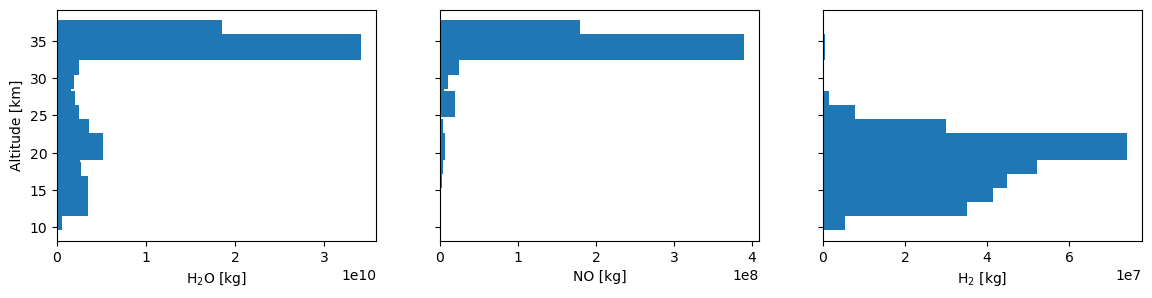

In [9]:
bins = np.linspace(0, 36, 20) # Altitude bins
bin_idxs = np.digitize(emission_inventory.data['Altitude [km]'], bins)
data = emission_inventory.data.groupby(bin_idxs).sum()
data.index=bins[data.index]

fig, axs = plt.subplots(1,3, figsize=(14,3), sharey=True)

axs[0].barh(data.index,data['H2O [kg]'],height=3.5), axs[0].set_ylabel('Altitude [km]'), axs[0].set_xlabel('H$_2$O [kg]')
axs[1].barh(data.index,data['NO [kg]'],height=3.5), axs[1].set_xlabel('NO [kg]')
axs[2].barh(data.index,data['H2 [kg]'],height=3.5), axs[2].set_xlabel('H$_2$ [kg]')
    
plt.show()

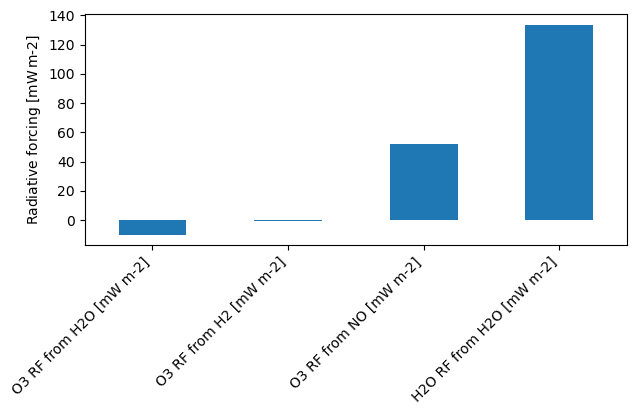

In [10]:
plt.figure(figsize=(7,3))

columns = ['O3 RF from H2O [mW m-2]','O3 RF from H2 [mW m-2]','O3 RF from NO [mW m-2]','H2O RF from H2O [mW m-2]']

data = emission_inventory.data[columns].sum()
data.plot.bar()

plt.ylabel('Radiative forcing [mW$\,$m-2]')
plt.xticks(rotation=45, ha="right")

plt.show()